<a href="https://colab.research.google.com/github/aldrick-t/puzzlebot-emdial/blob/dev-final/train/TLTSRecogni_train_YOLOv8_TWO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Remove old files (change directory as necessary)
!rm -r puzzlebot_emdial_vision.v8-emdial-tlts-v8.yolov8

In [ ]:
# Unzip dataset package
!unzip puzzlebot_emdial_vision.v8-emdial-tlts-v8.yolov8.zip -d .

In [ ]:
# Run in case of unzipping a file compressed in a Mac.
!rm -r __MACOSX/

In [ ]:
# Remove run history for a fresh training session (useful for changing datasets)
!rm -r runs/

In [ ]:
# Install the ultralytics lib. on the runtime to use YOLO
!pip install ultralytics

In [ ]:
# Import from ultralytics
from ultralytics import YOLO
from ultralytics import settings

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Define model (suggested: yolov8n (nano))
model = YOLO('yolov8n.yaml')

In [ ]:
# Training loop, ISOLATE FOR CLASSES 0, 1, 2 (TLs)
model.train(
    #Basic Params
    data='data.yaml',       #
    epochs=40,             # Max epochs
    imgsz=(128, 192),       # (height, width)
    batch=-1,               # auto batch size to fit 60% of CUDA mem
    device=0,               # GPU 0 on Colab
    workers=8,              # reduce parallel loaders
    patience=100,            # early stop if no improvement
    pretrained=False,        # Sets model to use as not pretrained

    # Advanced
    #time=4.0,                # limit time to max available runtime in Colab
    save=True,             # Saves training checkpoints and final model weights
    #save_period=1,           # Save interval
    optimizer= 'AdamW',     # Set optimizer to ensure AdamW
    #cache=True,             # Caches images in RAM for extra speed
    resume=True,            # Continues from latest checkpoint
    dropout=0.2,            # Dropout rate
    close_mosaic=20,         # Close mosaic aug. in the last n epochs
    classes=[0,1,2],      # Use when there are classes to ignore


    #Customizations
    name='jun5_v8_c',
    plots=True,

    # augmentations
    augment = True,

    # Safe compositional augmentations
    mosaic= 0.2,            # Very light Mosaic, enough to generalize layout
    mixup= 0.0,             # Keep disabled to preserve label semantics
    copy_paste= 0.0,        # Disabled (adds complexity with little benefit)

    # Color augmentations – mild jitter
    hsv_h= 0.005,           # Minimal hue change (sign colors are critical)
    hsv_s= 0.2,             # Slight saturation change
    hsv_v= 0.2,             # Slight brightness change (simulate lighting)

    # Geometric augmentations – mild for realism
    degrees= 0.5,           # Very small rotation (camera angle shift)
    translate= 0.05,        # ±5% translation
    scale= 0.05,            # Mild zoom in/out
    shear= 0.05,            # Mild shear to simulate perspective
    perspective= 0.0005,    # Barely any; signs must remain legible

    # Directionally safe – NO flipping
    flipud= 0.0,            # No vertical flips
    fliplr= 0.5,            # No horizontal flips (critical for l/r distinction)

    # Optional: add noise or blur for robustness
    # These are not native to YOLOv8 but can be added via Albumentations hooks
    # blur: 0.05            # Mild motion blur (simulate movement)
    # gaussian_noise: 0.03  # Simulate image sensor noise
)

Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=-1, bgr=0.0, box=7.5, cache=True, cfg=None, classes=[0, 1, 2], close_mosaic=20, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.5, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.1, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.005, hsv_s=0.2, hsv_v=0.2, imgsz=(128, 192), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.yaml, momentum=0.937, mosaic=0.2, multi_scale=False, name=jun5_v8_c, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=100, perspective=0.0005, plots=True, pose=12.0, pretrained=F

train: Scanning /content/train/labels.cache... 5588 images, 1167 backgrounds, 0 corrupt: 100%|██████████| 5588/5588 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.4GB RAM): 100%|██████████| 5588/5588 [00:02<00:00, 2037.51it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


AutoBatch: Computing optimal batch size for imgsz=192 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.48G reserved, 0.11G allocated, 14.15G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3012603      0.7382         0.369         19.54         20.95        (1, 3, 192, 192)                    list
     3012603       1.476         0.394         20.35         22.35        (2, 3, 192, 192)                    list
     3012603       2.953         0.422         20.86         21.16        (4, 3, 192, 192)                    list
     3012603       5.906         0.455         22.03         21.55        (8, 3, 192, 192)                    list
     3012603       11.81         0.528          23.4         31.84       (16, 3, 192, 192)                    list
AutoBatch: Using batch-size 758 for CUDA:0 8.59G/14.74G (58%) ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 237.1±92.2 MB/s, s

train: Scanning /content/train/labels.cache... 5588 images, 1167 backgrounds, 0 corrupt: 100%|██████████| 5588/5588 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



train: Caching images (0.4GB RAM): 100%|██████████| 5588/5588 [00:02<00:00, 2481.33it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 109.5±54.2 MB/s, size: 3.6 KB)


val: Scanning /content/valid/labels.cache... 1433 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1433/1433 [00:00<?, ?it/s]

WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.



val: Caching images (0.1GB RAM): 100%|██████████| 1433/1433 [00:01<00:00, 897.31it/s]


Plotting labels to runs/detect/jun5_v8_c/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.005921875), 63 bias(decay=0.0)
Image sizes 192 train, 192 val
Using 2 dataloader workers
Logging results to runs/detect/jun5_v8_c
Starting training for 40 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/40      8.01G      1.872      2.151      1.072        142        192: 100%|██████████| 8/8 [00:09<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.26s/it]

                   all       1433        766     0.0803      0.081     0.0586     0.0117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/40      8.01G      1.728      1.537      1.023        147        192: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.49s/it]

                   all       1433        766      0.214     0.0729      0.144     0.0399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/40      7.99G      1.386     0.8447     0.9204        161        192: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.92s/it]

                   all       1433        766      0.258      0.128      0.172     0.0685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/40      7.99G      1.331     0.7655     0.9124        119        192: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.83s/it]

                   all       1433        766      0.292      0.156      0.155     0.0569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/40         8G      1.339     0.7329     0.9092        156        192: 100%|██████████| 8/8 [00:07<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.36s/it]

                   all       1433        766      0.538       0.56      0.625      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/40      8.02G      1.274     0.7106     0.8955        160        192: 100%|██████████| 8/8 [00:07<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.71s/it]

                   all       1433        766      0.479      0.643      0.626      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/40      8.01G      1.257     0.6981     0.8921        172        192: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.39s/it]

                   all       1433        766   0.000289     0.0043   7.33e-05   2.01e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/40      8.03G      1.287     0.7051      0.899        150        192: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

                   all       1433        766      0.459      0.113       0.14      0.064



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/40      7.99G      1.282     0.7036      0.894        154        192: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.75s/it]

                   all       1433        766      0.873      0.671      0.787      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/40      7.99G      1.249     0.6992      0.885        164        192: 100%|██████████| 8/8 [00:09<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.26s/it]

                   all       1433        766      0.827      0.577       0.72      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/40      7.99G      1.265     0.6893     0.8919        174        192: 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.04s/it]

                   all       1433        766       0.84      0.665      0.797      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/40      7.99G       1.27     0.6809      0.898        148        192: 100%|██████████| 8/8 [00:07<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.10s/it]

                   all       1433        766      0.874      0.569      0.767      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/40      7.99G      1.329     0.7031     0.9083        158        192: 100%|██████████| 8/8 [00:08<00:00,  1.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.64s/it]

                   all       1433        766      0.872      0.688      0.815       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/40      7.99G      1.287     0.7024     0.8955        160        192: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.18s/it]

                   all       1433        766      0.889      0.901      0.922      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/40      8.02G      1.273      0.671     0.8964        154        192: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

                   all       1433        766      0.849      0.861      0.859      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/40      7.99G       1.27     0.6701     0.8941        151        192: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.09s/it]

                   all       1433        766      0.821      0.892      0.862      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/40      8.01G      1.222     0.6598     0.8844        136        192: 100%|██████████| 8/8 [00:07<00:00,  1.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.42s/it]

                   all       1433        766      0.924      0.839      0.918      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/40      8.01G      1.182     0.6316     0.8759        143        192: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.70s/it]

                   all       1433        766      0.751      0.888      0.787      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/40      7.99G      1.169     0.6293     0.8718        145        192: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.40s/it]

                   all       1433        766      0.656      0.884      0.704      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/40         8G      1.169     0.6422     0.8669        166        192: 100%|██████████| 8/8 [00:07<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.53s/it]

                   all       1433        766      0.768      0.896      0.804      0.477


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/40         8G      1.153      0.624      0.856        147        192: 100%|██████████| 8/8 [00:15<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.38s/it]

                   all       1433        766      0.902      0.872      0.947      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/40      7.99G      1.155     0.6085     0.8633        133        192: 100%|██████████| 8/8 [00:07<00:00,  1.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.34s/it]

                   all       1433        766      0.864      0.909      0.916      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/40      7.99G      1.144     0.5962     0.8627        147        192: 100%|██████████| 8/8 [00:08<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.22s/it]

                   all       1433        766      0.863      0.894      0.922      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/40      7.99G      1.113     0.5791     0.8526        125        192: 100%|██████████| 8/8 [00:06<00:00,  1.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.43s/it]

                   all       1433        766      0.917       0.92      0.958      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/40      7.99G      1.083      0.562     0.8505        128        192: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.42s/it]

                   all       1433        766      0.908      0.951      0.966       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/40      7.99G      1.096     0.5641     0.8534        129        192: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.37s/it]

                   all       1433        766      0.897      0.941      0.954      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/40      7.99G      1.085     0.5594     0.8514        145        192: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.02s/it]

                   all       1433        766      0.933      0.931      0.967      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/40         8G      1.084     0.5646     0.8492        128        192: 100%|██████████| 8/8 [00:07<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.77s/it]

                   all       1433        766      0.954      0.949      0.971      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/40         8G      1.048     0.5489     0.8415        148        192: 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.08s/it]

                   all       1433        766      0.961      0.953       0.97      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/40         8G       1.07       0.55     0.8505        158        192: 100%|██████████| 8/8 [00:06<00:00,  1.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.14s/it]

                   all       1433        766      0.964      0.963      0.972       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/40      7.99G      1.055     0.5364     0.8454        133        192: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.48s/it]

                   all       1433        766      0.947      0.971      0.976      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/40      7.99G      1.038     0.5351     0.8447        130        192: 100%|██████████| 8/8 [00:07<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.92s/it]

                   all       1433        766      0.957      0.968      0.974       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/40      7.99G      1.029     0.5309     0.8395        157        192: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.14s/it]

                   all       1433        766       0.96      0.972      0.973      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/40      7.99G      1.032     0.5304     0.8397        152        192: 100%|██████████| 8/8 [00:08<00:00,  1.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.31s/it]

                   all       1433        766      0.958      0.966       0.97      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/40      7.99G      1.027      0.522     0.8408        147        192: 100%|██████████| 8/8 [00:07<00:00,  1.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.89s/it]

                   all       1433        766      0.955      0.971      0.973      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/40      7.99G      1.018     0.5204     0.8438        145        192: 100%|██████████| 8/8 [00:06<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.04s/it]

                   all       1433        766      0.952      0.972      0.973      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/40      7.99G       1.01     0.5148     0.8395        134        192: 100%|██████████| 8/8 [00:07<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.61s/it]

                   all       1433        766      0.959      0.962      0.972      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/40      7.99G      1.005     0.5031     0.8367        119        192: 100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.69s/it]

                   all       1433        766      0.962      0.971      0.975       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/40      7.99G     0.9948     0.4936     0.8375        168        192: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.82s/it]

                   all       1433        766      0.962      0.969      0.976      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/40      7.99G     0.9837     0.4969     0.8341        129        192: 100%|██████████| 8/8 [00:08<00:00,  1.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.83s/it]

                   all       1433        766      0.964       0.97      0.977      0.672



40 epochs completed in 0.171 hours.
Optimizer stripped from runs/detect/jun5_v8_c/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/jun5_v8_c/weights/best.pt, 6.2MB

Validating runs/detect/jun5_v8_c/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.62s/it]


                   all       1433        766      0.918      0.958      0.968      0.642
              tl_green        208        213      0.888      0.972      0.971      0.659
                tl_red        254        267      0.939      0.948      0.963       0.66
             tl_yellow        286        286      0.926      0.955      0.971      0.607
Speed: 0.0ms preprocess, 0.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/jun5_v8_c


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2577bbd1d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [ ]:
model = YOLO('runs/detect/jun5_v8_d2/weights/best.pt')

In [ ]:
# Training loop, ISOLATE FOR CLASSES 3,4,5,6,7,8 (TSs)
model.train(
    #Basic Params
    data='data.yaml',       #
    epochs=10,             # Max epochs
    imgsz=(128, 192),       # (height, width)
    #batch=-1,               # auto batch size to fit 60% of CUDA mem
    batch=896,               # Else large batch
    device=0,               # GPU 0 on Colab
    workers=8,              # reduce parallel loaders
    patience=10,            # early stop if no improvement
    pretrained=False,        # Sets model to use as not pretrained

    # Advanced
    #time=4.0,                # limit time to max available runtime in Colab
    save=True,             # Saves training checkpoints and final model weights
    #save_period=1,           # Save interval
    optimizer= 'AdamW',     # Set optimizer to ensure AdamW
    #cache=True,             # Caches images in RAM for extra speed
    resume=False,            # Continues from latest checkpoint
    dropout=0.2,            # Dropout rate
    close_mosaic=20,         # Close mosaic aug. in the last n epochs
    classes=[3,4,5,6,7,8],      # Use when there are classes to ignore


    #Customizations
    name='jun5_v8_d',
    plots=True,

    # augmentations
    augment = False,

    # Safe compositional augmentations
    mosaic= 0.0,            # Very light Mosaic, enough to generalize layout
    mixup= 0.0,             # Keep disabled to preserve label semantics
    copy_paste= 0.0,        # Disabled (adds complexity with little benefit)

    # Color augmentations – mild jitter
    hsv_h= 0.001,           # Minimal hue change (sign colors are critical)
    hsv_s= 0.2,             # Slight saturation change
    hsv_v= 0.2,             # Slight brightness change (simulate lighting)

    # Geometric augmentations – mild for realism
    degrees= 0.5,           # Very small rotation (camera angle shift)
    translate= 0.05,        # ±5% translation
    scale= 0.00,            # Mild zoom in/out
    shear= 0.00,            # Mild shear to simulate perspective
    perspective= 0.0000,    # Barely any; signs must remain legible

    # Directionally safe – NO flipping
    flipud= 0.0,            # No vertical flips
    fliplr= 0.0,            # No horizontal flips (critical for l/r distinction)

    # Optional: add noise or blur for robustness
    # These are not native to YOLOv8 but can be added via Albumentations hooks
    # blur: 0.05            # Mild motion blur (simulate movement)
    # gaussian_noise: 0.03  # Simulate image sensor noise
)

Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=896, bgr=0.0, box=7.5, cache=False, cfg=None, classes=[3, 4, 5, 6, 7, 8], close_mosaic=20, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.5, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.001, hsv_s=0.2, hsv_v=0.2, imgsz=(128, 192), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=runs/detect/jun5_v8_c/weights/best.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=jun5_v8_d4, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, p

train: Scanning /content/train/labels.cache... 5588 images, 1167 backgrounds, 0 corrupt: 100%|██████████| 5588/5588 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 98.4±69.6 MB/s, size: 3.7 KB)


val: Scanning /content/valid/labels.cache... 1433 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1433/1433 [00:00<?, ?it/s]


Plotting labels to runs/detect/jun5_v8_d4/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.007), 63 bias(decay=0.0)
Image sizes 192 train, 192 val
Using 2 dataloader workers
Logging results to runs/detect/jun5_v8_d4
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.43G     0.9358     0.5408     0.8654        100        192: 100%|██████████| 7/7 [00:12<00:00,  1.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.61s/it]

                   all       1433        606      0.973      0.946      0.985      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.82G     0.9292      0.551     0.8649         93        192: 100%|██████████| 7/7 [00:07<00:00,  1.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.76s/it]

                   all       1433        606      0.952      0.959      0.983      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      9.82G     0.8366     0.4972     0.8469         88        192: 100%|██████████| 7/7 [00:06<00:00,  1.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.87s/it]

                   all       1433        606      0.964      0.966      0.987      0.745



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      9.82G     0.7885     0.4768     0.8385         86        192: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.77s/it]

                   all       1433        606       0.97      0.962      0.988      0.757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      9.84G     0.7653     0.4594     0.8404         95        192: 100%|██████████| 7/7 [00:06<00:00,  1.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.94s/it]

                   all       1433        606      0.972      0.971      0.985       0.75



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      9.81G     0.7413     0.4377     0.8394         89        192: 100%|██████████| 7/7 [00:06<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:07<00:00,  7.04s/it]

                   all       1433        606      0.979      0.967      0.987      0.767



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.81G     0.7344     0.4411     0.8321         98        192: 100%|██████████| 7/7 [00:06<00:00,  1.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.62s/it]

                   all       1433        606      0.976      0.966      0.987      0.756



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.81G      0.739      0.429     0.8294         81        192: 100%|██████████| 7/7 [00:10<00:00,  1.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.70s/it]

                   all       1433        606       0.98      0.965      0.985      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      9.81G     0.7303     0.4306     0.8277         87        192: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.11s/it]

                   all       1433        606      0.981      0.971      0.988      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.82G     0.6952     0.4112     0.8202         86        192: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:08<00:00,  8.84s/it]

                   all       1433        606      0.983       0.97      0.987      0.783



10 epochs completed in 0.044 hours.
Optimizer stripped from runs/detect/jun5_v8_d4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/jun5_v8_d4/weights/best.pt, 6.2MB

Validating runs/detect/jun5_v8_d4/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.38s/it]


                   all       1433        606      0.983       0.97      0.987      0.782
            ts_giveway        108        108      0.985      0.935      0.985      0.736
               ts_left        120        121      0.991      0.964      0.993      0.838
              ts_right         97         97      0.978      0.948      0.976      0.783
               ts_stop        105        105       0.99          1      0.995      0.834
           ts_straight         92         92      0.978      0.984      0.988       0.82
               ts_work         82         83      0.973      0.988      0.985      0.684
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/jun5_v8_d4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f2574584550>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
     

## Train for ALL classes
Train ALL after specific fine-tuning for TLs. Solves and produces final model.

Trains with no augmentation.

In [ ]:
model = YOLO('jun5_v8v8_b_tl.pt')

In [ ]:
# Training loop, ALL CLASSES 1,2,3,4,5,6,7,8 (TLTSs)
model.train(
    #Basic Params
    data='data.yaml',       #
    epochs=10,             # Max epochs
    imgsz=(128, 192),       # (height, width)
    batch=896,               # auto batch size to fit 60% of CUDA mem
    device=0,               # GPU 0 on Colab
    workers=8,              # reduce parallel loaders
    patience=10,            # early stop if no improvement
    pretrained=False,        # Sets model to use as not pretrained

    # Advanced
    #time=4.0,                # limit time to max available runtime in Colab
    save=True,             # Saves training checkpoints and final model weights
    #save_period=1,           # Save interval
    optimizer= 'AdamW',     # Set optimizer to ensure AdamW
    #cache=True,             # Caches images in RAM for extra speed
    #resume=True,            # Continues from latest checkpoint
    dropout=0.2,            # Dropout rate
    close_mosaic=20,         # Close mosaic aug. in the last n epochs
    #classes=[0,1,2,3,4,5,6,7,8],      # Use when there are classes to ignore


    #Customizations
    name='jun5_v8_e_uni',
    plots=True,

    #Augmentations
    augment = False,

        # Safe compositional augmentations
    mosaic= 0.0,            # Very light Mosaic, enough to generalize layout
    mixup= 0.0,             # Keep disabled to preserve label semantics
    copy_paste= 0.0,        # Disabled (adds complexity with little benefit)

    # Color augmentations – mild jitter
    hsv_h= 0.000,           # Minimal hue change (sign colors are critical)
    hsv_s= 0.0,             # Slight saturation change
    hsv_v= 0.0,             # Slight brightness change (simulate lighting)

    # Geometric augmentations – mild for realism
    degrees= 0.0,           # Very small rotation (camera angle shift)
    translate= 0.00,        # ±5% translation
    scale= 0.00,            # Mild zoom in/out
    shear= 0.00,            # Mild shear to simulate perspective
    perspective= 0.0000,    # Barely any; signs must remain legible

    # Directionally safe – NO flipping
    flipud= 0.0,            # No vertical flips
    fliplr= 0.0,            # No horizontal flips (critical for l/r distinction)

    # Optional: add noise or blur for robustness
    # These are not native to YOLOv8 but can be added via Albumentations hooks
    # blur: 0.05            # Mild motion blur (simulate movement)
    # gaussian_noise: 0.03  # Simulate image sensor noise
)

Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=896, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=20, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.2, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, imgsz=(128, 192), int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=jun5_v8v8_b_tl.pt, momentum=0.937, mosaic=0.0, multi_scale=False, name=jun5_v8_e_uni2, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained

train: Scanning /content/train/labels.cache... 5588 images, 1167 backgrounds, 0 corrupt: 100%|██████████| 5588/5588 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 102.3±31.2 MB/s, size: 3.7 KB)


val: Scanning /content/valid/labels.cache... 1433 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1433/1433 [00:00<?, ?it/s]


Plotting labels to runs/detect/jun5_v8_e_uni2/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.007), 63 bias(decay=0.0)
Image sizes 192 train, 192 val
Using 2 dataloader workers
Logging results to runs/detect/jun5_v8_e_uni2
Starting training for 10 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.43G       1.18       1.89     0.8974        200        192: 100%|██████████| 7/7 [00:14<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.89s/it]

                   all       1433       1372      0.321      0.323      0.326      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.83G      1.281      2.426     0.9133        194        192: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:13<00:00, 13.87s/it]

                   all       1433       1372       0.32      0.295      0.319      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      9.83G      1.174      1.996      0.916        198        192: 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.86s/it]

                   all       1433       1372      0.345      0.891      0.777      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      9.83G      1.055     0.9824     0.8891        180        192: 100%|██████████| 7/7 [00:06<00:00,  1.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.24s/it]

                   all       1433       1372      0.696      0.776      0.861      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      9.83G      1.008     0.7221     0.8763        201        192: 100%|██████████| 7/7 [00:07<00:00,  1.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.53s/it]

                   all       1433       1372      0.803       0.86      0.928      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      9.83G     0.9721     0.6435     0.8652        199        192: 100%|██████████| 7/7 [00:07<00:00,  1.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:06<00:00,  6.23s/it]

                   all       1433       1372       0.89      0.891      0.968      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.83G     0.9082     0.5699     0.8549        205        192: 100%|██████████| 7/7 [00:07<00:00,  1.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:09<00:00,  9.89s/it]

                   all       1433       1372      0.928      0.894      0.974       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.83G     0.8792     0.5351     0.8507        187        192: 100%|██████████| 7/7 [00:07<00:00,  1.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.60s/it]

                   all       1433       1372      0.951      0.949      0.977       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      9.83G     0.8458     0.5102     0.8476        197        192: 100%|██████████| 7/7 [00:07<00:00,  1.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.32s/it]

                   all       1433       1372      0.954      0.949      0.977      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.83G      0.815      0.478     0.8441        203        192: 100%|██████████| 7/7 [00:07<00:00,  1.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:12<00:00, 12.12s/it]

                   all       1433       1372      0.966      0.944      0.979      0.713



10 epochs completed in 0.046 hours.
Optimizer stripped from runs/detect/jun5_v8_e_uni2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/jun5_v8_e_uni2/weights/best.pt, 6.2MB

Validating runs/detect/jun5_v8_e_uni2/weights/best.pt...
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.38s/it]


                   all       1433       1372      0.968      0.944      0.979      0.713
              tl_green        208        213      0.979      0.972      0.984      0.676
                tl_red        254        267      0.957      0.922      0.961      0.661
             tl_yellow        286        286      0.958      0.962      0.967      0.633
            ts_giveway        108        108       0.98      0.907      0.987       0.69
               ts_left        120        121      0.962      0.959      0.987      0.804
              ts_right         97         97      0.939      0.948      0.961      0.732
               ts_stop        105        105       0.98      0.971      0.994      0.801
           ts_straight         92         92      0.957      0.959       0.99       0.78
               ts_work         82         83          1      0.895      0.982      0.637
Speed: 0.0ms preprocess, 0.2ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x791a2e5969d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0470

## Prediction Testing (latest model)
Runs predictions on randomly selected images from testing split.


WARNING ⚠️ imgsz=[120, 160] must be multiple of max stride 32, updating to [128, 160]
0: 128x160 1 tl_red, 1 ts_left, 1 ts_right, 21.4ms
Speed: 0.7ms preprocess, 21.4ms inference, 1.5ms postprocess per image at shape (1, 3, 128, 160)


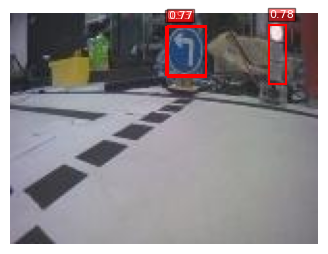

In [ ]:
import random, matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# pick one test image
test_files = [f for f in os.listdir('test/images/') if f.endswith('.jpg')]
f = random.choice(test_files)
img = Image.open(f'test/images/{f}').convert('RGB')

# run prediction
results = model.predict(
    source=img,
    imgsz=(120,160),
    conf=0.25,
    device=0
)[0]

# plot
fig, ax = plt.subplots(1, figsize=(4,3))
ax.imshow(img.resize((160,120)))
for *box, conf, cls in results.boxes.data.cpu().numpy():
    x1,y1,x2,y2 = box
    rect = patches.Rectangle((x1,y1), x2-x1, y2-y1,
                             linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1-4, f"{conf:.2f}", color='white',
            bbox=dict(facecolor='red', alpha=0.5, pad=1), fontsize=8)
ax.axis('off')
plt.show()

In [ ]:
model_a = YOLO('runs/detect/jun5_v8_c/weights/best.pt')  # detects 3 classes
model_b = YOLO('runs/detect/jun5_v8_d/weights/best.pt')  # detects 6 classes

In [ ]:
print(model_a.model.model[-1])  # Detection head
print(model_b.model.model[-1])

## Model Merger
Unused toolbox.

In [ ]:
import torch

In [ ]:
# Extract detection heads
detect_a = model_a.model.model[-1]  # Detect() layer
detect_b = model_b.model.model[-1]

# Create a new detect layer with 9 classes
from copy import deepcopy
merged_model = YOLO('yolov8n.pt')  # Or whatever version you're using
merged_detect = deepcopy(merged_model.model.model[-1])
merged_detect.nc = 9  # num_classes
merged_detect.no = 9 + 5

# Update anchors and strides from one of the existing models
merged_detect.anchors = detect_a.anchors
merged_detect.stride = detect_a.stride
merged_detect.nl = detect_a.nl  # number of layers
merged_detect.na = detect_a.na  # number of anchors

# Update weights
for i in range(len(detect_a.m)):
    # Conv layers for each detect scale
    merged_conv = merged_detect.m[i]
    conv_a = detect_a.m[i]
    conv_b = detect_b.m[i]

    # Get weights
    wa = conv_a.weight.data
    ba = conv_a.bias.data
    wb = conv_b.weight.data
    bb = conv_b.bias.data

    # Initialize merged weights
    merged_weight = merged_conv.weight.data.clone()
    merged_bias = merged_conv.bias.data.clone()

    # Map classes
    merged_weight[:(3*5 + 3)] = wa[:(3*5 + 3)]  # shared obj/bbox
    merged_weight[(3*5 + 3):(3*5 + 6 + 3)] = wb[(3*5 + 0):(3*5 + 6)]  # next 6 classes

    merged_bias[:(3*5 + 3)] = ba[:(3*5 + 3)]
    merged_bias[(3*5 + 3):(3*5 + 6 + 3)] = bb[(3*5 + 0):(3*5 + 6)]

    # Replace
    merged_conv.weight.data = merged_weight
    merged_conv.bias.data = merged_bias

# Plug new detect into model
merged_model.model.model[-1] = merged_detect

In [ ]:
merged_model.save('merged_model.pt')

## Prediction Testing
Runs predictions on randomly selected images from testing split.

In [ ]:
import random, matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import os

# pick one test image
test_files = [f for f in os.listdir('test/images/') if f.endswith('.jpg')]
f = random.choice(test_files)
img = Image.open(f'test/images/{f}').convert('RGB')

# run prediction
results = merged_model.predict(
    source=img,
    imgsz=(120,160),
    conf=0.25,
    device=0
)[0]

# plot
fig, ax = plt.subplots(1, figsize=(4,3))
ax.imshow(img.resize((160,120)))
for *box, conf, cls in results.boxes.data.cpu().numpy():
    x1,y1,x2,y2 = box
    rect = patches.Rectangle((x1,y1), x2-x1, y2-y1,
                             linewidth=1.5, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.text(x1, y1-4, f"{conf:.2f}", color='white',
            bbox=dict(facecolor='red', alpha=0.5, pad=1), fontsize=8)
ax.axis('off')
plt.show()

## Benchmarks
Benchmark on inference device with selected model.

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU (CUDA) Single
benchmark(model="jun5_v8v8_e_uni_tlts.pt", data="data.yaml", imgsz=192, half=False, device=0)

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on GPU (CUDA) Auto
benchmark(model="jun5_v8v8_e_uni_tlts.pt", data="data.yaml", imgsz=192, half=False, device=-1)

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on Apple Silicon (MPS)
benchmark(model="jun5_v8v8_e_uni_tlts.pt", data="data.yaml", imgsz=192, half=False, device='mps')

In [ ]:
from ultralytics.utils.benchmarks import benchmark

# Benchmark on CPU
benchmark(model="jun5_v8v8_e_uni_tlts.pt", data="data.yaml", imgsz=192, half=False, device='cpu')

## Validations
Bulk validation screening for each fine-tuned and later unified model.

In [ ]:
model = YOLO('jun5_v8v8_b_tl.pt')

In [ ]:
results = model.val(
    data="data.yaml",
    split='val',
    device=0,
    batch=896,
    imgsz=(128, 192),
    half=True,
    workers=16,
    verbose=True,

)

WARNING ⚠️ updating to 'imgsz=192'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 197.0±81.3 MB/s, size: 2.9 KB)


val: Scanning /content/valid/labels.cache... 1433 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1433/1433 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:13<00:00,  6.52s/it]


                   all       1433       1372      0.321      0.323      0.326      0.224
              tl_green        208        213      0.976      0.981      0.986      0.694
                tl_red        254        267       0.97      0.959      0.968      0.683
             tl_yellow        286        286      0.945      0.969      0.977      0.637
            ts_giveway        108        108          0          0          0          0
               ts_left        120        121          0          0          0          0
              ts_right         97         97          0          0          0          0
               ts_stop        105        105          0          0          0          0
           ts_straight         92         92          0          0          0          0
               ts_work         82         83          0          0          0          0
Speed: 0.3ms preprocess, 0.3ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect

In [ ]:
model = YOLO('jun5_v8v8_d_ts.pt')

In [ ]:
results = model.val(
    data="data.yaml",
    split='val',
    device=0,
    batch=896,
    imgsz=(128, 192),
    half=True,
    workers=16,
    verbose=True,

)

WARNING ⚠️ updating to 'imgsz=192'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 187.5±60.1 MB/s, size: 3.5 KB)


val: Scanning /content/valid/labels.cache... 1433 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1433/1433 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:06<00:00,  3.25s/it]


                   all       1433       1372       0.65      0.654       0.66      0.541
              tl_green        208        213          0          0          0          0
                tl_red        254        267          0          0          0          0
             tl_yellow        286        286          0          0          0          0
            ts_giveway        108        108      0.972      0.954      0.993       0.76
               ts_left        120        121      0.974      0.983      0.991      0.861
              ts_right         97         97      0.965      0.979      0.978      0.824
               ts_stop        105        105      0.986          1      0.995       0.86
           ts_straight         92         92      0.964          1      0.994      0.856
               ts_work         82         83      0.988      0.974      0.986      0.705
Speed: 0.2ms preprocess, 0.3ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect

In [ ]:
model = YOLO('runs/detect/jun5_v8_e_uni2/weights/best.pt')

In [ ]:
results = model.val(
    data="data.yaml",
    split='val',
    device=0,
    batch=896,
    imgsz=(128, 192),
    half=True,
    workers=16,
    verbose=True,

)

WARNING ⚠️ updating to 'imgsz=192'. 'train' and 'val' imgsz must be an integer, while 'predict' and 'export' imgsz may be a [h, w] list or an integer, i.e. 'yolo export imgsz=640,480' or 'yolo export imgsz=640'
Ultralytics 8.3.150 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n summary (fused): 72 layers, 3,007,403 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.6±1.3 ms, read: 1.6±1.3 MB/s, size: 3.5 KB)


val: Scanning /content/valid/labels.cache... 1433 images, 272 backgrounds, 0 corrupt: 100%|██████████| 1433/1433 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:15<00:00,  7.95s/it]


                   all       1433       1372      0.968      0.944      0.979      0.713
              tl_green        208        213      0.979      0.972      0.984      0.676
                tl_red        254        267      0.957      0.922      0.961      0.661
             tl_yellow        286        286      0.958      0.962      0.967      0.633
            ts_giveway        108        108       0.98      0.907      0.987       0.69
               ts_left        120        121      0.962      0.959      0.987      0.804
              ts_right         97         97      0.939      0.948      0.961      0.732
               ts_stop        105        105       0.98      0.971      0.994      0.801
           ts_straight         92         92      0.957      0.959       0.99       0.78
               ts_work         82         83          1      0.895      0.982      0.637
Speed: 0.1ms preprocess, 0.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect